In [1]:
import pandas as pd
!pip install scikit-learn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing   import MaxAbsScaler
from joblib import dump

In [3]:
df_data = pd.read_csv("../../results/3_data_coded.csv")
df_data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0


In [4]:
df_data['Outcome'].value_counts()

Outcome
0    426
1    193
Name: count, dtype: int64

<Axes: xlabel='Insulin'>

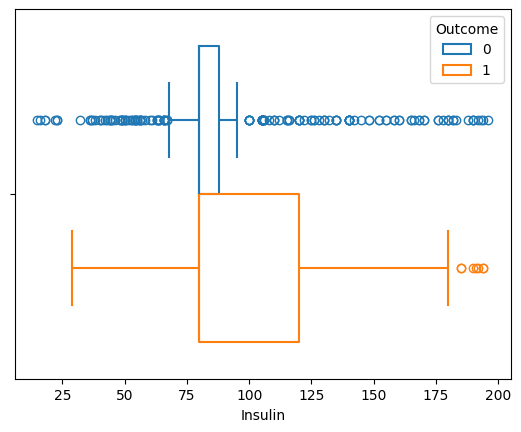

In [5]:
sns.boxplot(data= df_data, x='Insulin', hue='Outcome', fill=False)

In [6]:
df_data_positive = df_data[df_data["Outcome"] == 1]
df_data_negative = df_data[df_data["Outcome"] == 0]

In [7]:
df_data_negative = shuffle(df_data_negative, random_state=42)

In [8]:
df_data_negative_filter = df_data_negative[:len(df_data_positive)]
df_data_negative_filter2 = df_data_negative[len(df_data_positive):]


In [9]:
df_data_negative_filter2.to_csv("../../results/4_testing_negatives.csv", index=False)

In [10]:
df_data_for_training = pd.concat([df_data_positive, df_data_negative_filter], axis=0)
df_data_for_training.shape

(386, 9)

In [11]:
X_train, X_test = train_test_split(df_data_for_training, test_size=.1, random_state=42)
X_test.shape

(39, 9)

In [12]:
X_test.to_csv("../../results/4_testing_mix.csv", index= False)

In [13]:
response = X_train["Outcome"]
X_values = X_train.drop(columns=["Outcome"])

In [14]:
X_values_to_standarize = X_values[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
X_values_to_standarize

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
65,7,83.0,78.0,26.000000,71.000000,29.3,0.767,36
129,6,104.0,74.0,18.000000,156.000000,29.9,0.722,41
150,5,139.0,80.0,35.000000,160.000000,31.6,0.361,25
580,0,141.0,84.0,26.000000,79.799479,32.4,0.433,22
480,1,173.0,74.0,20.536458,79.799479,36.8,0.088,38
...,...,...,...,...,...,...,...,...
221,0,146.0,70.0,20.536458,79.799479,37.9,0.334,28
319,5,136.0,84.0,41.000000,88.000000,35.0,0.286,35
69,1,107.0,68.0,19.000000,79.799479,26.5,0.165,24
350,1,97.0,70.0,15.000000,79.799479,18.2,0.147,21


In [15]:
X_values_to_standarize.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000
mean,4.112392,123.592748,72.698025,25.528458,93.586448,31.881204,0.434709,33.930836
std,3.415629,29.022384,11.044036,8.393653,33.906052,6.205643,0.250437,11.500483
min,0.000000,56.000000,44.000000,8.000000,16.000000,18.200000,0.085000,21.000000
25%,1.000000,102.000000,66.000000,20.536458,79.799479,27.450000,0.248500,24.000000
50%,3.000000,117.000000,72.000000,21.000000,79.799479,31.600000,0.347000,31.000000
75%,7.000000,142.000000,80.000000,31.000000,100.000000,35.400000,0.587500,41.000000
max,13.000000,197.000000,104.000000,49.000000,196.000000,50.000000,1.191000,66.000000


<Axes: xlabel='Age', ylabel='Count'>

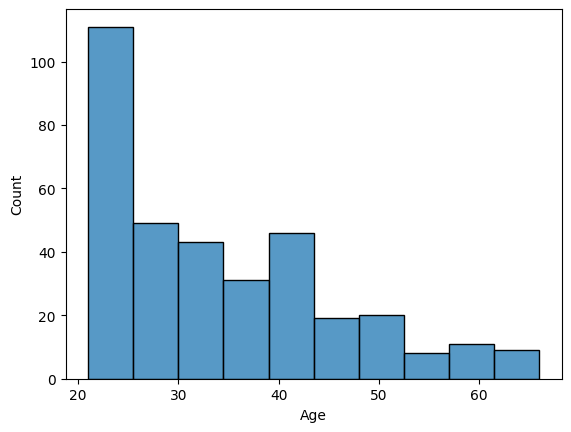

In [16]:
sns.histplot(data = X_values_to_standarize, x='Age')

In [17]:
scaler_instance = MaxAbsScaler()
scaler_instance.fit(X_values_to_standarize.values)
X_values_to_standarize_scaler = scaler_instance.transform(X_values_to_standarize.values)


In [18]:
X_scaler = pd.DataFrame(data=X_values_to_standarize_scaler, columns=X_values_to_standarize.columns)
X_scaler

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.538462,0.421320,0.750000,0.530612,0.362245,0.586,0.643997,0.545455
1,0.461538,0.527919,0.711538,0.367347,0.795918,0.598,0.606213,0.621212
2,0.384615,0.705584,0.769231,0.714286,0.816327,0.632,0.303107,0.378788
3,0.000000,0.715736,0.807692,0.530612,0.407140,0.648,0.363560,0.333333
4,0.076923,0.878173,0.711538,0.419111,0.407140,0.736,0.073887,0.575758
...,...,...,...,...,...,...,...,...
342,0.000000,0.741117,0.673077,0.419111,0.407140,0.758,0.280437,0.424242
343,0.384615,0.690355,0.807692,0.836735,0.448980,0.700,0.240134,0.530303
344,0.076923,0.543147,0.653846,0.387755,0.407140,0.530,0.138539,0.363636
345,0.076923,0.492386,0.673077,0.306122,0.407140,0.364,0.123426,0.318182


In [19]:
X_train['Outcome'] = response.values
X_train['Outcome'].value_counts()

Outcome
0    179
1    168
Name: count, dtype: int64

In [20]:
X_train.to_csv("../../results/4_train_dataset.csv", index=False)

In [21]:
dump(scaler_instance, "../../results/scaler_process.joblib")

['../../results/scaler_process.joblib']